In [13]:
import keras
from keras.layers import *
from keras.models import Model, Sequential, load_model
from keras.regularizers import *
from keras.activations import *

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
train_data=pd.read_csv('mnist_train.csv',header=None)
test_data=pd.read_csv('mnist_test.csv',header=None)

In [16]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60001 entries, 0 to 60000
Columns: 785 entries, 0 to 784
dtypes: object(785)
memory usage: 359.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 785 entries, 0 to 784
dtypes: object(785)
memory usage: 59.9+ MB
None


In [17]:
train_data=train_data.iloc[1:]
test_data=test_data.iloc[1:]

In [18]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_train=train_data.drop(columns=[0]).astype(int)
y_train=train_data[0].astype(int)
X_test=test_data.drop(columns=[0]).astype(int)
y_test=test_data[0].astype(int)

In [21]:
print(np.shape(X_train))
X_train=np.array(X_train).reshape((60000,28,28,1))
X_test=np.array(X_test).reshape((10000,28,28,1))
#X_train=np.reshape(X_train,(20000,28,28,1))

In [22]:
Y_train=pd.get_dummies(y_train)
np.shape(Y_train)

(60000, 10)

In [44]:
model=Sequential()
model.add(InputLayer((28,28,1)))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',padding='valid'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu',padding='valid'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu',padding='valid'))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [45]:
model.fit(X_train,Y_train,validation_split=0.3,epochs=3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 38s 894us/step - loss: 0.2540 - acc: 0.9301 - val_loss: 0.1023 - val_acc: 0.9697
Epoch 2/3
42000/42000 [==============================] - 37s 884us/step - loss: 0.0842 - acc: 0.9751 - val_loss: 0.0969 - val_acc: 0.9733
Epoch 3/3
42000/42000 [==============================] - 38s 911us/step - loss: 0.0618 - acc: 0.9816 - val_loss: 0.0791 - val_acc: 0.9779


In [46]:
y_pred=model.predict(X_test)
Y_pred=np.argmax(y_pred,axis=1)
np.mean((Y_pred==y_test))

0.9828

# Visualisation

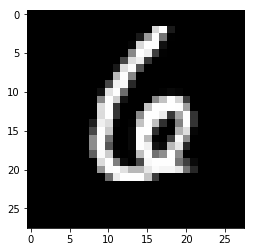

In [68]:

plt.imshow(X_test[123].reshape(28,28),cmap='gray')


In [69]:
print('Predicted value')
Y_pred[123]

Predicted value


6

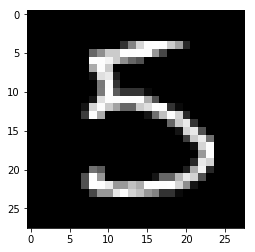

In [70]:
plt.imshow(X_test[15].reshape(28,28),cmap='gray')

In [71]:
print('Predicted value')
Y_pred[15]

Predicted value


5